<a href="https://colab.research.google.com/github/MatheusHavoc/Classificao_Predicao-_Milk/blob/main/Classificao_Predi%C3%A7%C3%A3o_Milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lamentavelmente, o Github.com não suporta gráficos em HTML, o que dificulta a visualização dos gráficos gerados neste projeto. Para que possa ter acesso aos gráficos gerados, recomendamos que clique no botão acima para abrir o Colab. Assim, você poderá visualizar de forma mais elaborada os gráficos gerados, sem necessidade executar o código novamente.**

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Classificação - Predição 
na qualidade do leite

## Contextualização

Classificação - Predição na qualidade do leite
 
Feature:
- pH
- Temprature
- Taste
- Odor
- Fat
- Turbidity
- Colour

Target:
- Grade


To-Dos do exercício:

- Transformar a variável target (Grade) de string para numérica (0,1,2). Lembrando que é um problema multiclasse (Uma única coluna de target) e não multi-label (Múltiplas colunas de target).
- Separação de Treino X Teste:
> Separa o conjunto de treino e teste com os dados resultante em 50% para cada.
- Normalização dos dados:
> Utilizando a função StandardScaler já fornecida, normaliza os dados de treino (Somente é usado o fit em cima dos dados de treino) e teste das colunas pH, Temperature e Colour.
- Treinar o modelo:
> Se quiserem, podem brincar com os parâmetros do modelo
- Validação do modelo:
> Analisar a acurácia do modelo com dados de teste
> Criar matriz de confusão para avaliar o modelo
> Verificar outras métricas de performance do modelo (Se quiser)



Dataset: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

## Instalação biblioteca

In [71]:
%pip install scikit-learn==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importação das bibliotecas

In [72]:
# Importação de bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Exploratory Data Analysis (EDA)

In [73]:
df = pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [75]:
df.columns = ['ph', 'temp', 'taste', 'odor', 'fat', 'turb', 'colour', 'target']

In [76]:
df.describe(percentiles=[0.1,0.8,0.9,0.95,0.99])

,ph,temp,taste,odor,fat,turb,colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
10%,4.500000,36.000000,0.000000,0.000000,0.000000,0.000000,245.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
80%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
90%,8.600000,55.000000,1.000000,1.000000,1.000000,1.000000,255.000000
95%,9.000000,66.000000,1.000000,1.000000,1.000000,1.000000,255.000000
99%,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [77]:
#df.target.value_counts().plot.bar()

Text(0.5, 1.0, 'Contagem da variável de destino')

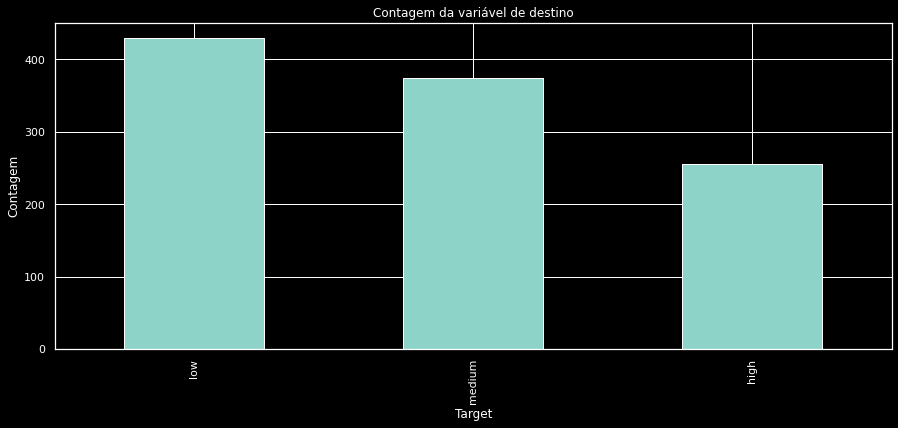

In [78]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
ax = df.target.value_counts().plot.bar()
ax.set_xlabel('Target')
ax.set_ylabel('Contagem')
ax.set_title('Contagem da variável de destino')

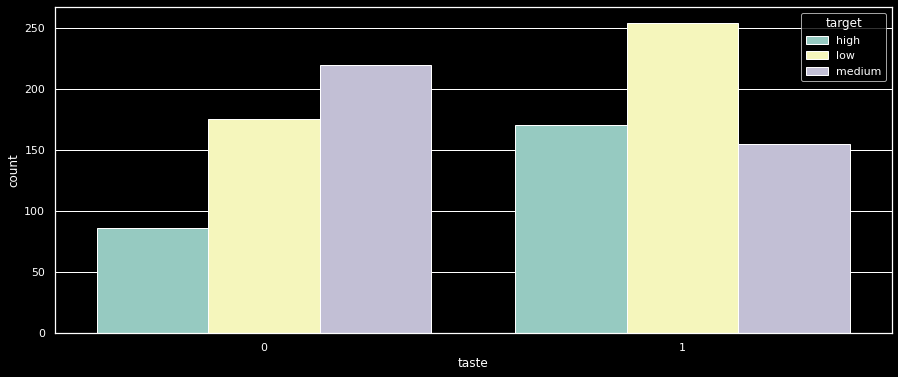

In [79]:
sns.countplot(data=df,x='taste',hue='target')
# ajustar tamanho do gráfico
sns.set(rc={'figure.figsize':(15,6)})

<Axes: xlabel='fat', ylabel='count'>

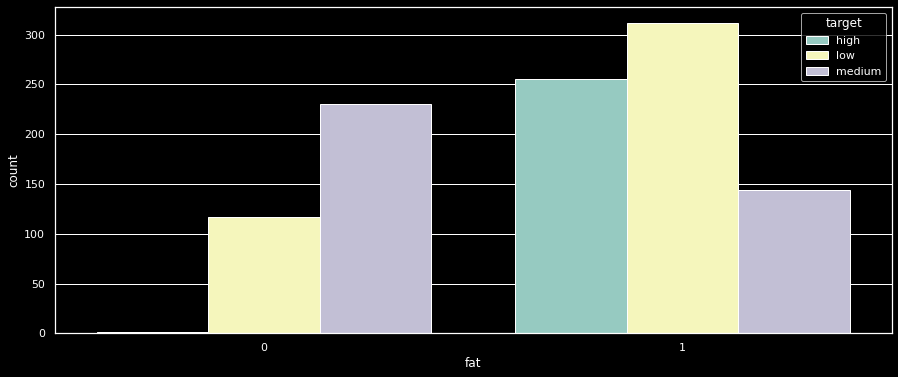

In [98]:
plt.style.use('dark_background')
sns.countplot(data=df,x='fat',hue='target')

<Axes: xlabel='turb', ylabel='count'>

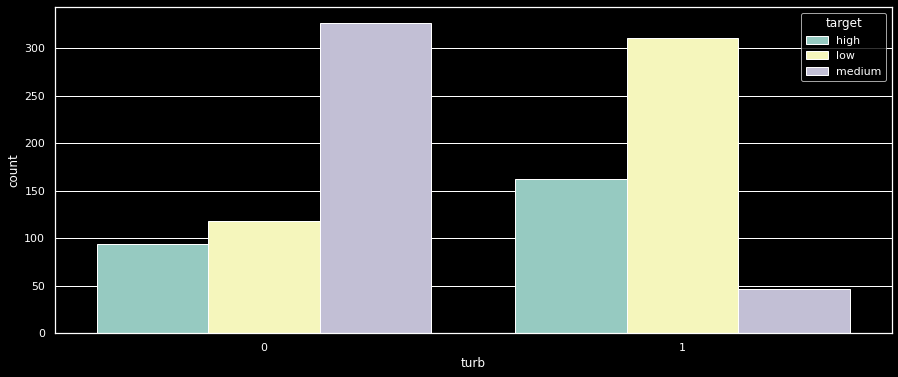

In [99]:
plt.style.use('dark_background')
sns.countplot(data=df,x='turb',hue='target')

<Axes: xlabel='ph', ylabel='Count'>

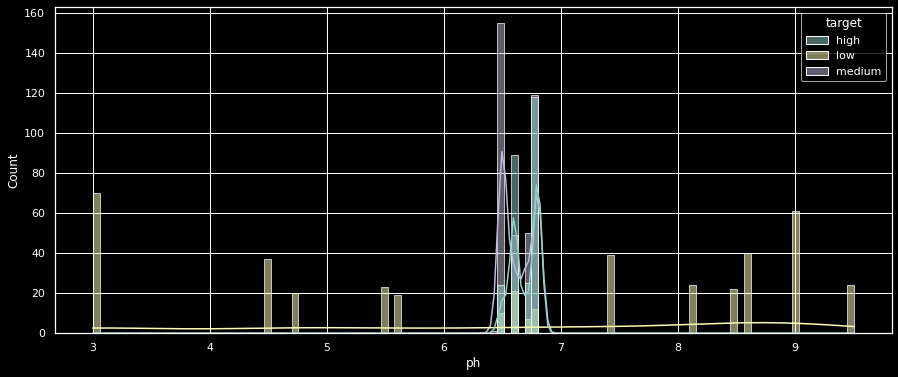

In [101]:
plt.style.use('dark_background')
sns.histplot(data=df,kde=True,x='ph',hue='target')

<Axes: xlabel='temp', ylabel='Count'>

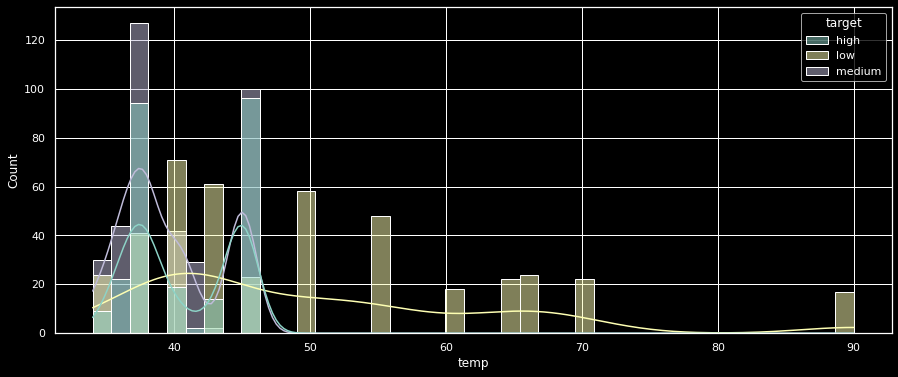

In [102]:
plt.style.use('dark_background')
sns.histplot(data=df,kde=True,x='temp',hue='target')

<Axes: xlabel='colour', ylabel='Count'>

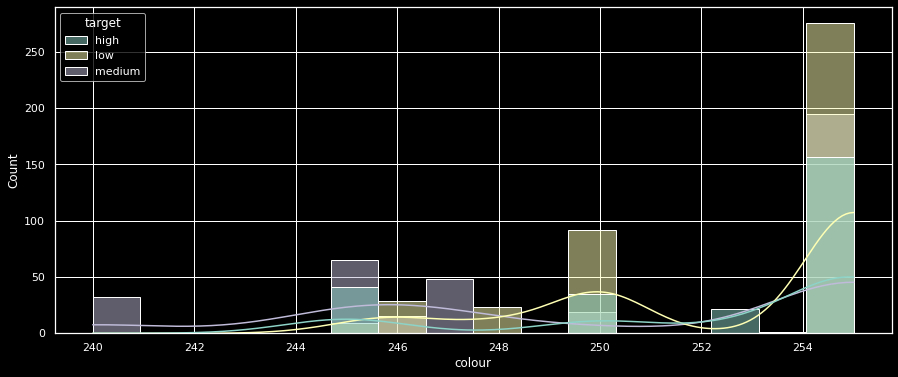

In [103]:
plt.style.use('dark_background')
sns.histplot(data=df,kde=True,x='colour',hue='target')

<Axes: >

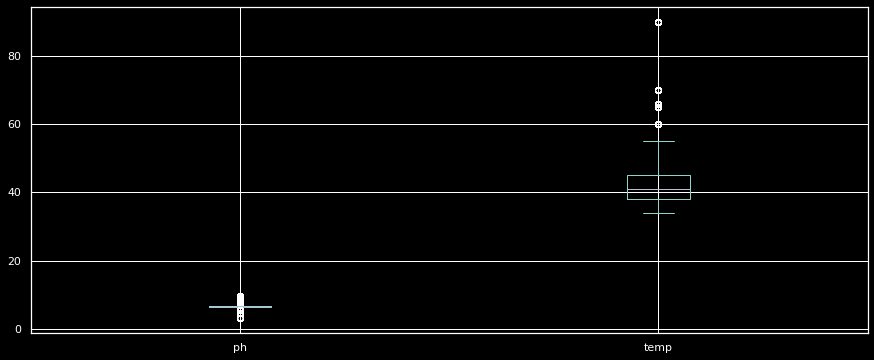

In [104]:
plt.style.use('dark_background')
df[['ph','temp']].plot.box()

#MODELING TECHNIQUES

 Separação Treino X Teste

In [86]:
X = df[df.columns[df.columns != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

##TEST DESIGN

In [87]:
scaler_columns = ['ph', 'temp','colour']

scaler = StandardScaler()
scaler.fit(X_train[scaler_columns])

X_train[scaler_columns] = scaler.transform(X_train[scaler_columns])
X_test[scaler_columns] = scaler.transform(X_test[scaler_columns])

X_train

,ph,temp,taste,odor,fat,turb,colour
59,0.119794,0.081565,0,0,1,0,0.741579
864,-0.023742,0.583282,0,0,0,1,-0.392878
487,-0.095510,1.084999,1,0,1,0,-1.300444
706,-0.095510,-0.620840,1,0,1,0,0.741579
769,-2.607396,-0.420153,1,1,1,1,0.741579
...,...,...,...,...,...,...,...
622,2.057535,-1.022214,1,1,0,1,0.741579
265,-0.095510,-0.821527,0,0,1,0,0.741579
673,-0.741423,0.583282,0,1,1,1,0.741579
683,0.119794,0.081565,0,1,1,1,0.741579


 Treinamento do modelo

In [88]:
KNC = KNeighborsClassifier()
KNC.fit(X_train,y_train)

KNeighborsClassifier()

## MODEL EVALUATION

In [89]:
y_pred = KNC.predict(X_test)
y_true = y_test

In [90]:
# Acuracy
metrics.accuracy_score(y_true,y_pred)

0.9830188679245283

In [91]:
# Full report
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

        high       0.99      0.96      0.98       138
         low       1.00      0.98      0.99       208
      medium       0.96      1.00      0.98       184

    accuracy                           0.98       530
   macro avg       0.98      0.98      0.98       530
weighted avg       0.98      0.98      0.98       530



##  DATA PIPELIN

In [92]:
# Train-test split
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [93]:
# Pipeline de pré-processamento
preprocessor = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), ['ph','temp']),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False), ['colour']), #OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
], remainder='passthrough')

# Mostrando resultado do pré-processamento
preprocessor.set_output(transform='pandas').fit_transform(X_train)

,scaler__ph,scaler__temp,onehot__colour_240,onehot__colour_245,onehot__colour_246,onehot__colour_247,onehot__colour_248,onehot__colour_250,onehot__colour_253,onehot__colour_255,remainder__taste,remainder__odor,remainder__fat,remainder__turb
614,0.098421,-0.595868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
910,-0.864370,0.057910,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1
793,1.727759,-0.128884,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1
950,0.098421,-0.782661,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,1,0
517,-0.049701,-0.689264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.098421,0.057910,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1
853,-0.049701,-0.595868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
277,0.098421,0.057910,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0
1043,0.098421,-0.409074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1


In [94]:
# Pipeline de pré-processamento + modelagem
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Mostrando pipeline completo
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['ph', 'temp']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['colour'])])),
                ('model', RandomForestClassifier())])

In [95]:
# Aplicando pré-processamento + treino
pipeline.fit(X_train, y_train)

# Adquirindo predições
y_pred = pipeline.predict(X_test)

# Avaliando métricas do modelo
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       118
         low       1.00      1.00      1.00       217
      medium       0.99      1.00      1.00       195

    accuracy                           1.00       530
   macro avg       1.00      1.00      1.00       530
weighted avg       1.00      1.00      1.00       530



In [96]:
model = pipeline.named_steps['model']
pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False).to_frame('importance')

,importance
scaler__ph,0.366735
scaler__temp,0.241608
remainder__fat,0.097294
remainder__turb,0.087120
remainder__odor,0.064593
remainder__taste,0.050118
onehot__colour_245,0.019673
onehot__colour_255,0.016986
onehot__colour_253,0.014839
onehot__colour_250,0.010552
